# The Central Limit Theorem

Peter Ralph

https://uodsci.github.io/dsci345

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd
import dsci345 as dsci # for dsci.pretty() below

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\cov}{\text{cov}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\cov` and `\sd` in LaTeX below.

# Estimating means

Suppose we have lots of observations of something and want to estimate the mean
(i.e., the mean value of the source we're getting the observations from).
"Obviously", we should use the *sample mean*:
$$ \bar X = \frac{1}{n} \left( X_1 + X_2 + \cdots + X_n \right) . $$

Let's suppose that all the $X_i$ are independent copies of some random variable,
and that
$$  \E[X_i] = \mu \qquad \text{and} \qquad \var[X_i] = \sigma^2 .$$

We'd like to infer the value of $\mu$.

Is this a sensible thing to do? Well,
by linearity of $\E[ ]$,
$$\begin{aligned}
    \E[\bar X]
    &=
    \E[ \frac{1}{n} \left( X_1 + \cdots + X_n \right) ]
    \\ &=
    \frac{1}{n} \left( \E[X_1] + \cdots + \E[X_n] \right)
    \\ &=
    \frac{1}{n} \left( \mu + \cdots + \mu \right)
    \\ &=
    \mu .
\end{aligned}$$

Okay, that's a good sign? But, it's nice to know how far off it would be in practice.


To see how far off it would tend to be, let's compute the standard deviation;
as usual, it's easier to compute the variance (then we take the square root).
Since the $X_i$ are independent, the variance of their sum is the sum of their variances,
and also $\var[a X] = a^2 \var[X]$,
so
$$\begin{aligned}
    \var[\bar X]
    &=
    \var[ \frac{1}{n} \left( X_1 + \cdots + X_n \right) ]
    \\ &=
    \frac{1}{n^2} \left( \var[X_1] + \cdots + \var[X_n] \right)
    \\ &=
    \frac{\sigma^2}{n} .
\end{aligned}$$

So,
$$ \sd[\bar X] = \frac{\sigma}{\sqrt{n}} . $$ 

In [96]:
# np.mean([np.abs(np.mean(rng.exponential(scale=5, size=100)) - 5) for _ in range(100)])
np.mean(rng.exponential(scale=5, size=10000))

5.020002580749066

We've learned that $\bar X$ is an unbiased estimator of $\mu$,
with an error of order $\sigma/\sqrt{n}$.

**Next:** can we say more about the error? *Yes*, amazingly.

*Exercise:* check this, by
(a) taking the mean of 100 random draws;
and then (b) taking the mean of 10000 random draws;
the second should be 10x closer to the true mean on average.

# Aside: covariance

That's if the observations are *independent*;
what if they aren't? Consider the *covariance*:
$$ \cov[X,Y] = \E[(X - \E[X])(Y -\E[Y])] . $$
This is a measure of "how much do $X$ and $Y$ tend to go up and down (relative to their means) together".

As with the variance, this is equal to
$$  \cov[X, Y] = \E[XY] - \E[X]\E[Y]. $$
In fact, $\var[X] = \cov[X,X]$.

Two useful facts:

1. *Covariance is bilinear*: 
    $$ \cov[ a X + Y, Z ] = a \cov[X, Y] + \cov[Y, Z] .$$

2. If $X$ and $Y$ are independent, then $\cov[X,Y] = 0$.

So, what happens to $\bar X$ if all $X_i$ have the same distribution, but $\cov[X_i, X_j] = v$?
$$\begin{aligned}
\var[\bar X]
&=
\var[(X_1 + \cdots + X_n)/n]
\\ &=
\frac{1}{n^2}\cov[(X_1 + \cdots + X_n), (X_1 + \cdots + X_n)]
\\ &=
\frac{1}{n^2} \sum_{ij} \cov[X_i, X_j]
\\ &=
\frac{1}{n^2} \left(
    \sum_i \var[X_i] + \sum_{i \neq j} \cov[X_i, X_j]
\right)
\\ &=
\frac{1}{n^2} \left(
    n \sigma^2 + n(n-1) v
\right)
\\ &=
\frac{\sigma^2}{n} + \left(1 - \frac{1}{n}\right) v .
\end{aligned}$$

# The central limit theorem

The **central limit theorem** says that* if $\bar X = (X_1 + \cdot + X_n)/n$
is the sample mean of $n$ independent random variables
that each have mean $\mu$ and standard deviation $\sigma$,
then
$$
    \P\left\{
        \frac{ \bar X - \mu }{ \sigma / \sqrt{n} }
        > 
        x
    \right\}
    \approx
    \int_x^\infty \frac{e^{-y^2 / 2}}{\sqrt{2 \pi}} dy ,
$$
i.e., $\bar X$ has a distribution that is approximation Normal,
with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

$^*$ *note:* the approximation is better the bigger $n$ is
and the "less weird" the distribution of $X_i$ is.

How big, and how weird? Good question - an easy answer comes by simulation.

# Adding up lots of little things

We've talked about the Central Limit Theorem,
a.k.a., "Normal approximation" or "Gaussian approximation".
Let's see how to works in practice!

## Random walk

Let's suppose we take a walk as follows:
flip a fair coin; if heads, go one step north; if tails, go one step south.
Let $X_k = +1$ if we go north of the $k^\text{th}$ step, and $X_k = -1$ if we go south,
and $S_n = X_1 + X_2 + \cdots + X_n$ be the displacement to the north after $n$ steps.

Note that
$$ \E[X_k] = 0 \qquad \text{and} \qquad \sd[X_k] = 1 , $$
so
$$ \E[S_n] = 0 \qquad \text{and} \qquad \sd[S_n] = \sqrt{n} . $$

*Exercise:* make up another story about what $S_n$ is.

Let's investigate. Here's one walk:

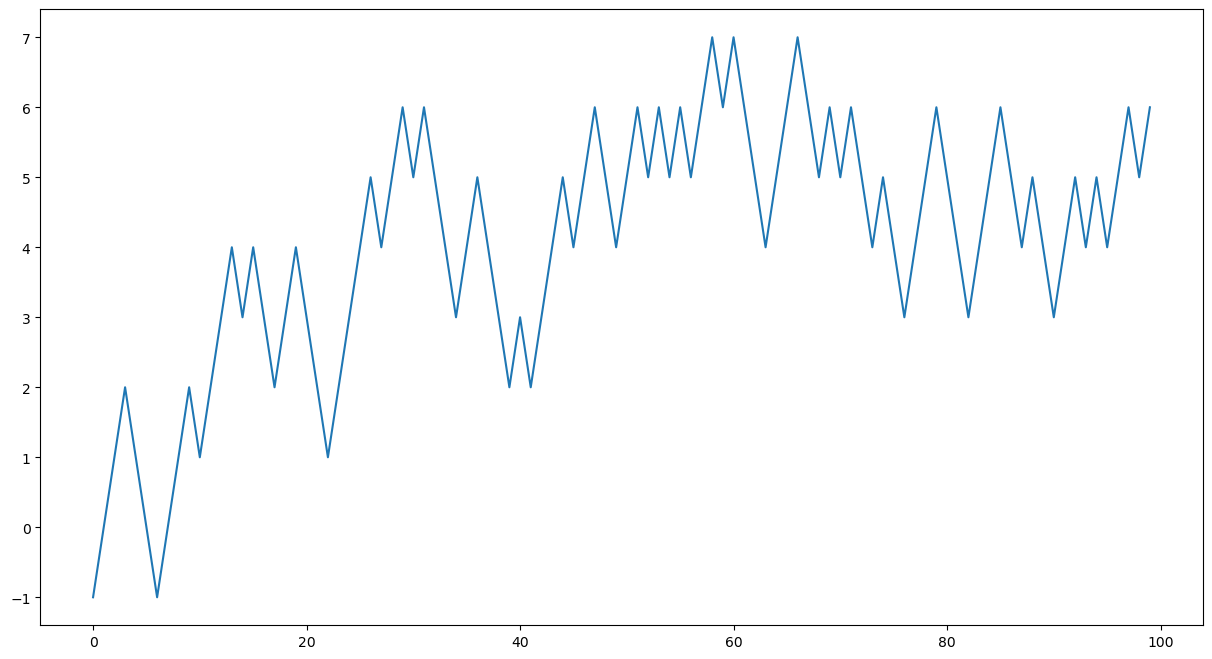

In [108]:
n = 100
X = rng.choice([-1, 1], size=n, replace=True)
S = np.cumsum(X)
plt.plot(S);

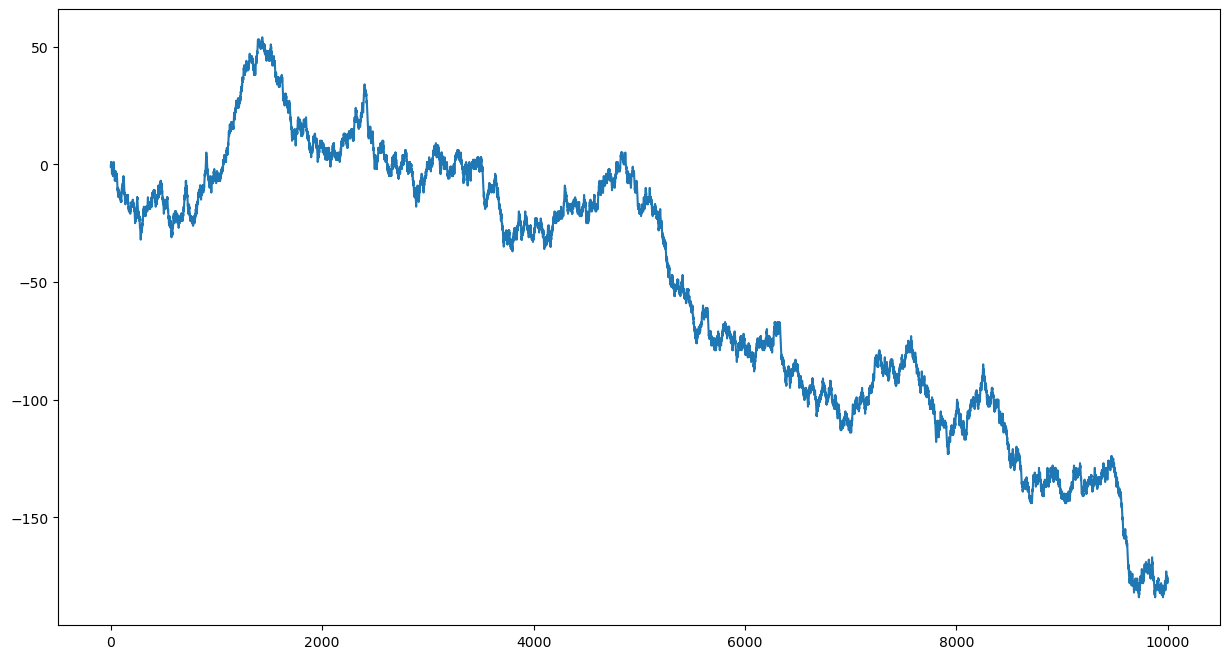

In [113]:
n = 10000
X = rng.choice([-1, 1], size=n, replace=True)
S = np.cumsum(X)
plt.plot(S);

Here's lots of walks, and only the distribution of $S_n$, i.e., where they end up.

In [114]:
def walks(n, size):
    X = rng.choice([-1, 1], size=(size, n))
    S = np.sum(X, axis=1)
    return S

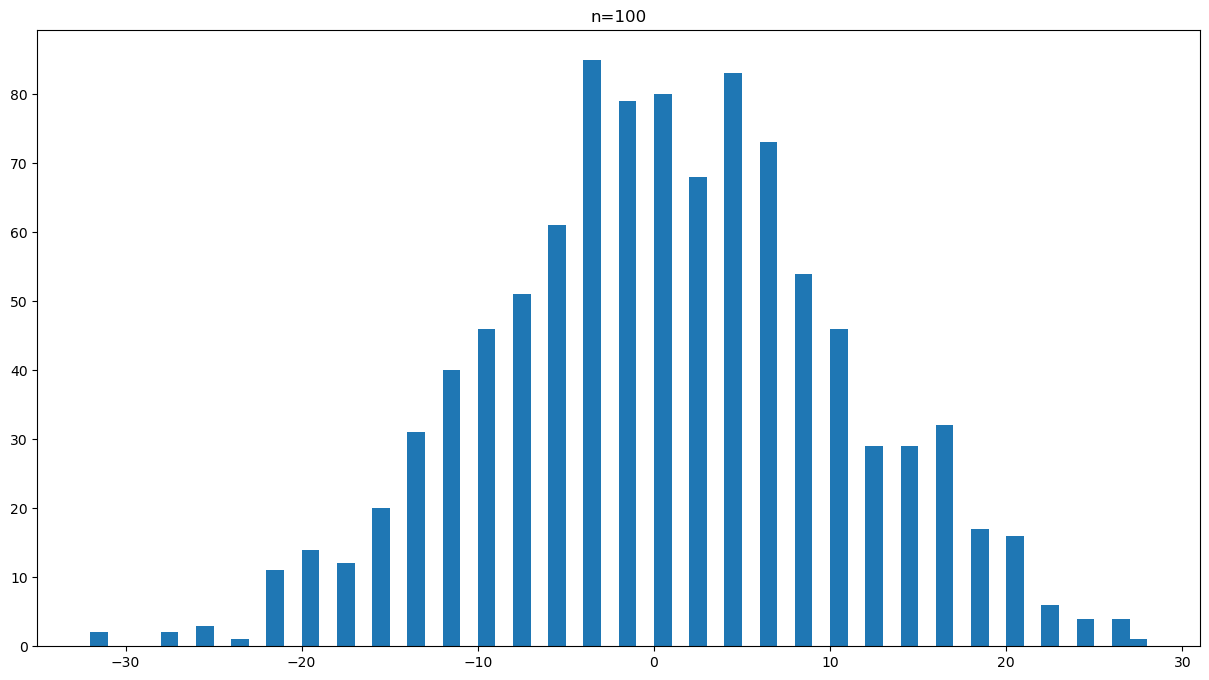

In [121]:
n = 100
S = walks(n=n, size=1000)
plt.hist(S, bins=dsci.pretty(S, 50))
plt.title(f"n={n}");

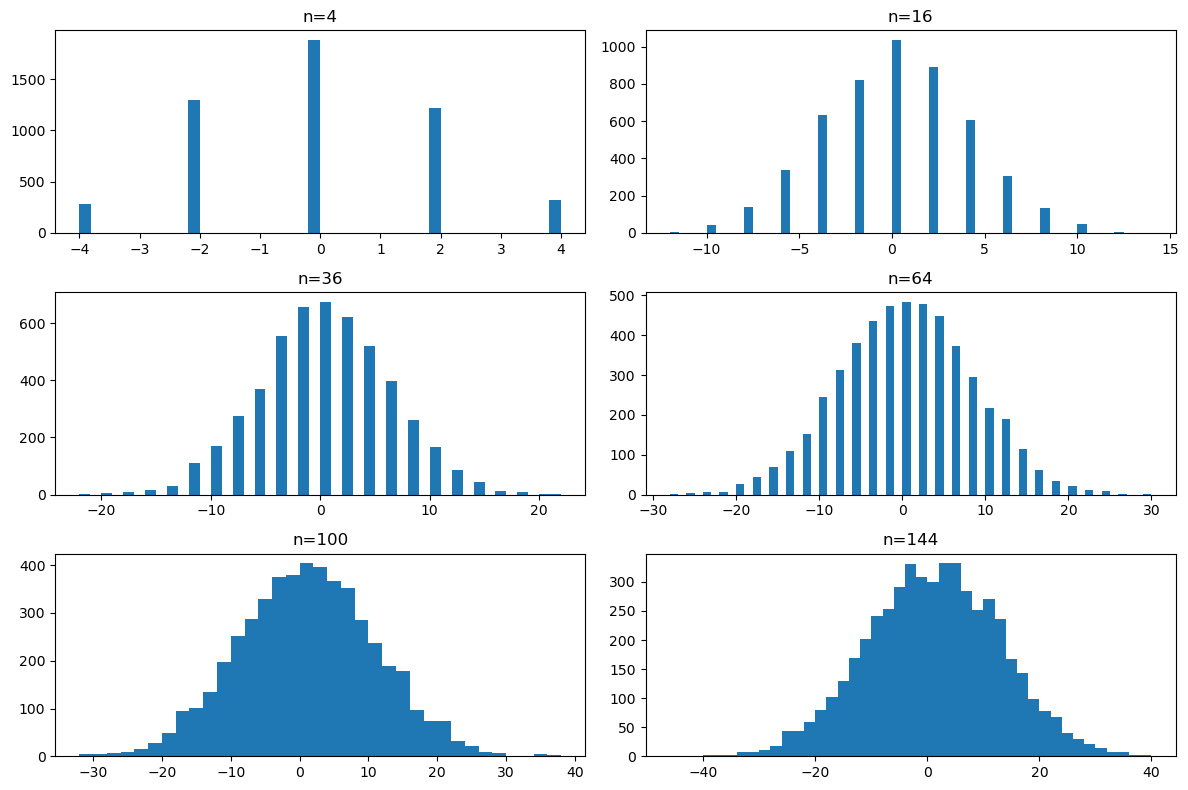

In [122]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
for k, ax in enumerate(axes.flatten()):
    n = 4 * (k+1)**2
    S = walks(n=n, size=5000)
    ax.hist(S, bins=dsci.pretty(S, 50))
    ax.set_title(f"n={n}")
plt.tight_layout()

# Sums of exponentials

Let's say now that $X_1, X_2, \ldots$ are independent Exponential(1) random variables.
Their sum has mean $n$, so let's look at
 $$ S_n = X_1 + \cdots + X_n  - n . $$
Notice that
 $$ \bar X - 1 = \frac{1}{n} S_n . $$
 
*Exercise:* Make up a story for what $S_n$ is.

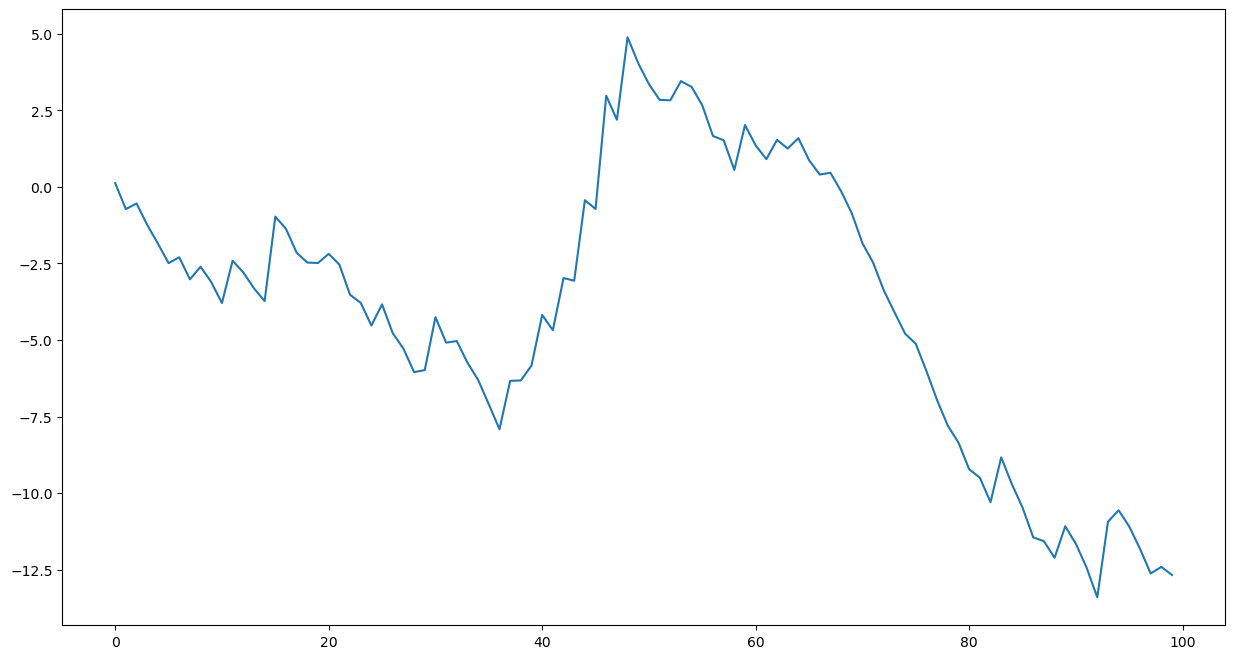

In [130]:
n = 100
X = rng.exponential(1, size=n) - 1
S = np.cumsum(X)
plt.plot(S);

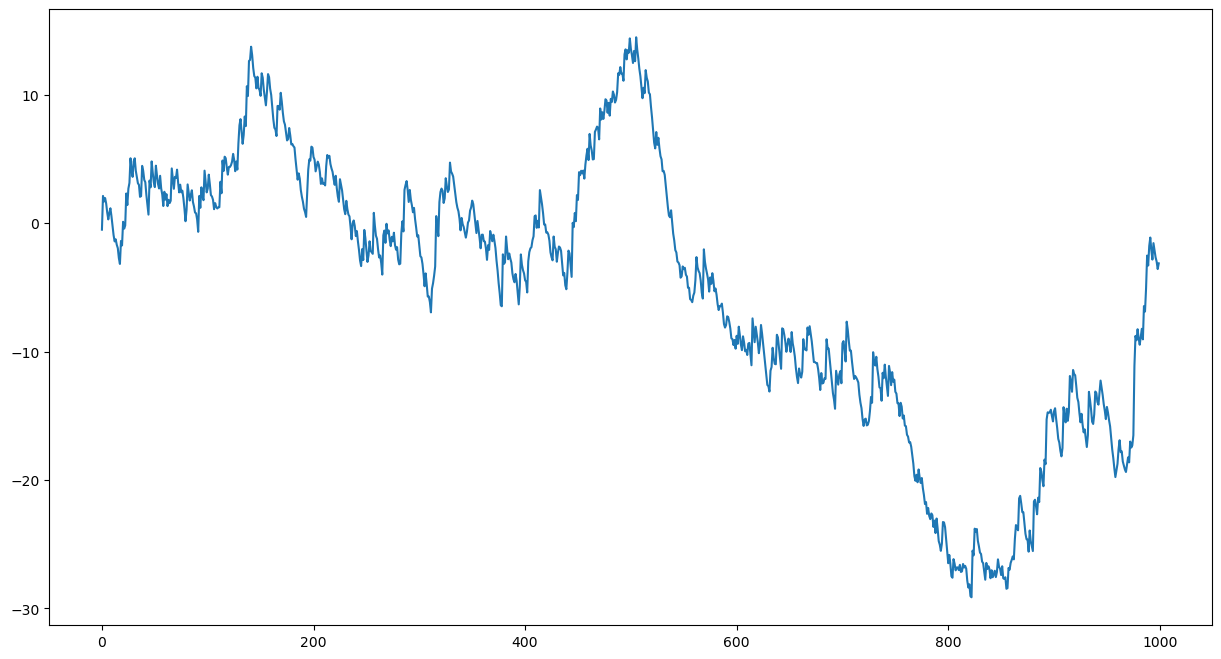

In [131]:
n = 1000
X = rng.exponential(1, size=n) - 1
S = np.cumsum(X)
plt.plot(S);

In [132]:
def exp_walks(n, size):
    X = rng.exponential(1, size=(size, n))
    S = np.sum(X, axis=1)
    return S

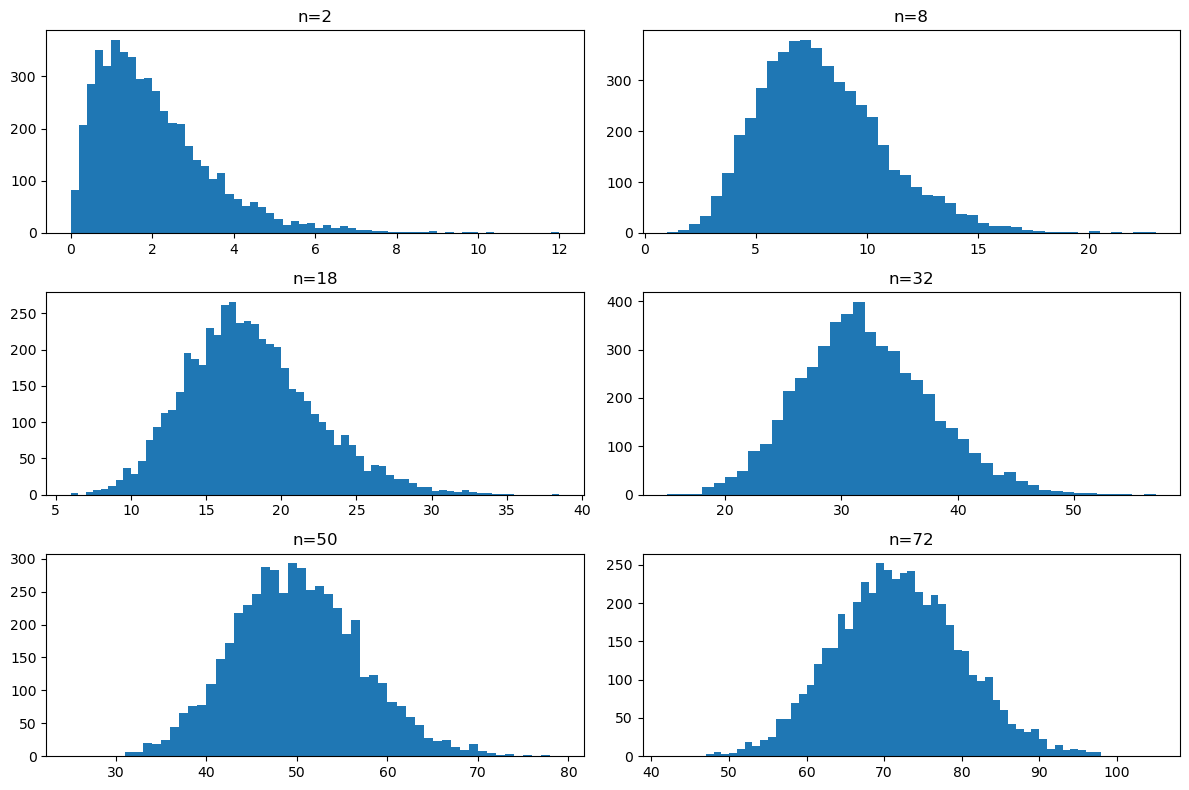

In [134]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
for k, ax in enumerate(axes.flatten()):
    n = 2 * (k+1)**2
    S = exp_walks(n=n, size=5000)
    ax.hist(S, bins=dsci.pretty(S, 50))
    ax.set_title(f"n={n}")
plt.tight_layout()

# Example: counting bikes

Suppose we are estimating bike lane usage
by counting bikes from 5-6pm every day at a particular spot.
If we do it for 25 days,
and the number per day has mean 120 with standard deviation 50,
how close will our average be to 120?

Well, $\bar X$ is the average number of bikes/day over $n=25$ days,
so we know that $\E[\bar X] = \mu = 120$ bikes,
and $\sd[\bar X] = \sigma / \sqrt{n} = 50 / \sqrt{25} = 10$ bikes...
so, within $\pm 20$ bikes or so?

In [135]:
from scipy.stats import norm
x = 20
2 * (1 - norm.cdf(120 + x, scale=10, loc=120))

0.04550026389635842

More precisely,
$$ \bar X \approx \text{Normal}(\text{mean}=120, \text{sd}=10) ,$$
so
$$
 \P\left\{
 | \bar X - 120 | > x
 \right\}
 \approx
 2 \int_{10x}^\infty \frac{e^{-y^2/2}}{\sqrt{2 \pi}} dy .
$$

# Example: jelly beans

Each bag of jelly beans has 100 beans in it.
The average weight per bag is 240g,
with and SD of 10g.
Bags weighing less than 210g can't be sold.
What percent of the bags are too light?

In [136]:
norm.cdf(210, loc=240, scale=10)

0.0013498980316300933

Note what we did there - to answer the question, we needed
to know the *probability distribution* of $W$, which was not stated,
only the mean and SD!
So, we said that "gee since it's the sum of a bunch of things it's probably Normal".